## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?


Regression is used for predicting continuous values. The output variable is numerical, and models are trained to minimize errors. Classification is used for predicting discrete categories. The output variable consists of class labels, and performance is typically measured with metrics like accuracy, precision, recall, or F1-score. While regression outputs a real number, classification outputs a probability distribution over classes, assigning the most likely label.

2. What is a confusion table? What does it help us understand about a model's performance?


A confusion matrix is a table that summarizes a classification model's performance by comparing actual versus predicted values. A confusion matrix helps diagnose whether the model is biased towards a certain class (for instance, always predicting the majority class).

3. What does the SSE quantify about a particular model?



Sum of Squared Errors, or SSE, measures the total squared difference between actual and predicted values in regression models. A lower SSE indicates better fit, meaning the model's predicted values are closer to the actual values, and vice versa.

4. What are overfitting and underfitting?


Overfitting and underfitting describe how well a model generalizes to new data. The former refers to when a model learns too much noise from the training data, performing well on training but poorly on test data. The latter refers to when a model is too simple to capture patterns, leading to poor performance on the training and test data.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?


Dividing data into training and testing sets ensures models generalize well to unseen data. If a model is trained and tested on the same data, it risks memorizing patterns instead of learning. In classification, k influences model complexity, with a small k translating to high variance and a sensitivity to noise, a large k meaning high bias and a tendency to oversimply relationships, and an optimal k minimizing test error.  

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

When making predictions in classification, models can output either a class label (hard prediction) or a probability distribution (soft prediction). Hard predictions provide a single answer, which is easy to interpret and useful in cases like medical diagnoses. However, they do not convey uncertainty and can be misleading when confidence levels are low. Soft predictions, which output probabilities over all possible classes, allow for more nuanced decision-making. For instance, in weather forecasting, knowing a 70% chance of rain is more informative than a binary “yes” or “no.” Soft predictions also enable threshold tuning, which is useful in applications like fraud detection. However, they require additional decision-making layers and can be harder to interpret. Choosing between these approaches depends on the application: hard predictions are suitable for straightforward classification tasks, while soft predictions offer flexibility when uncertainty must be accounted for.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB
None
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000
    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0         

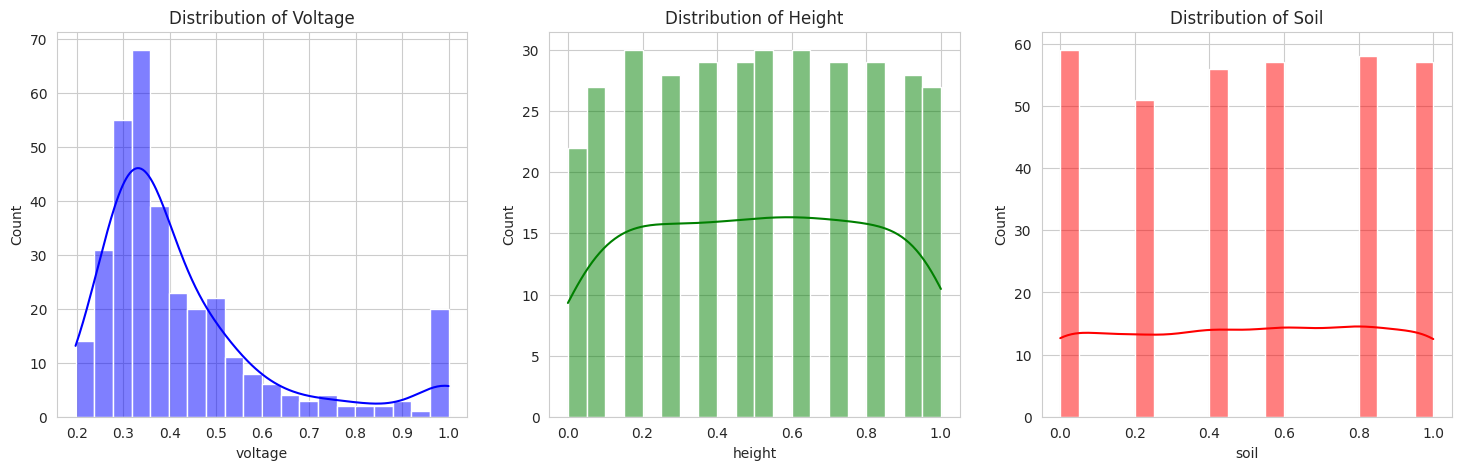

<ipython-input-2-ab48dd08d5ac>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['mine_type'], palette='pastel')


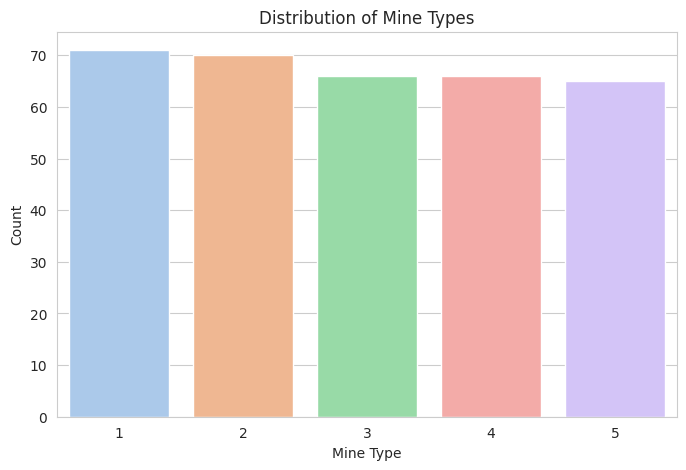

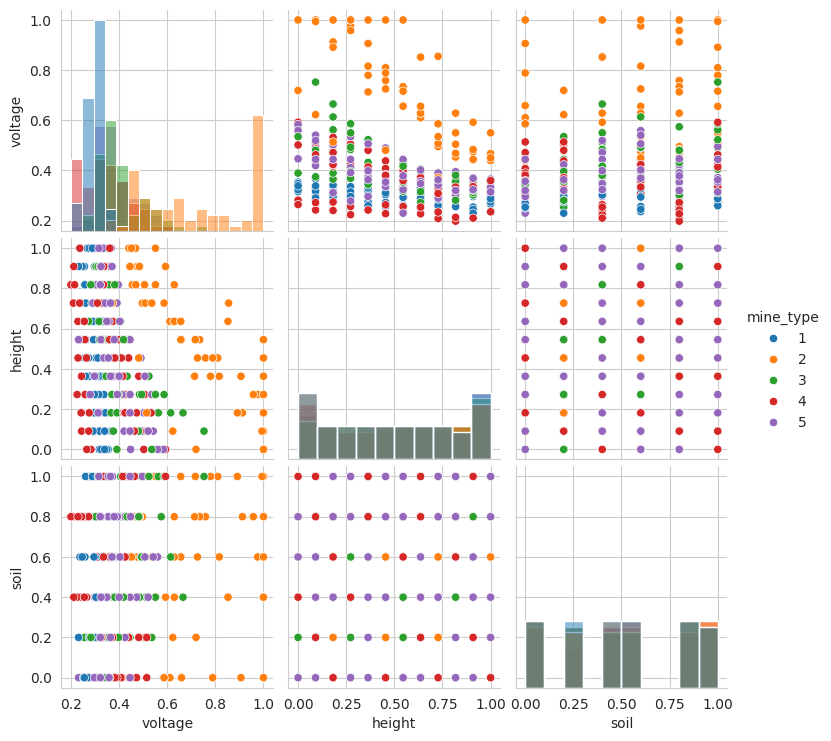

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "https://raw.githubusercontent.com/deancuva/knn/refs/heads/main/data/land_mines.csv"
df = pd.read_csv(file_path)

print(df.info())

print(df.describe())

print(df.head())

target_distribution = df['mine_type'].value_counts()
print("Mine Type Distribution:\n", target_distribution)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['voltage'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Voltage')

sns.histplot(df['height'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Height')

sns.histplot(df['soil'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Soil')

plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df['mine_type'], palette='pastel')
plt.title('Distribution of Mine Types')
plt.xlabel('Mine Type')
plt.ylabel('Count')
plt.show()

sns.pairplot(df, hue='mine_type', palette='tab10', diag_kind="hist")
plt.show()


2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


In [3]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.5, random_state=42, stratify=df['mine_type'])

train_size = train_df.shape[0]
test_size = test_df.shape[0]

train_distribution = train_df['mine_type'].value_counts(normalize=True)
test_distribution = test_df['mine_type'].value_counts(normalize=True)

train_size, test_size, train_distribution, test_distribution


(169,
 169,
 mine_type
 1    0.207101
 2    0.207101
 3    0.195266
 5    0.195266
 4    0.195266
 Name: proportion, dtype: float64,
 mine_type
 1    0.213018
 2    0.207101
 3    0.195266
 4    0.195266
 5    0.189349
 Name: proportion, dtype: float64)

3. Build a $k$-NN classifier. Explain how you select $k$.


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train = train_df.drop(columns=['mine_type'])
y_train = train_df['mine_type']
X_test = test_df.drop(columns=['mine_type'])
y_test = test_df['mine_type']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

optimal_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

optimal_k, best_accuracy


(1, 0.5088757396449705)

I tested k values from 1 to 20 and evaluated accuracy for each.
The model was trained on the scaled dataset (since k-NN relies on distance calculations). The best k was chosen based on the highest accuracy on the test set.

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?


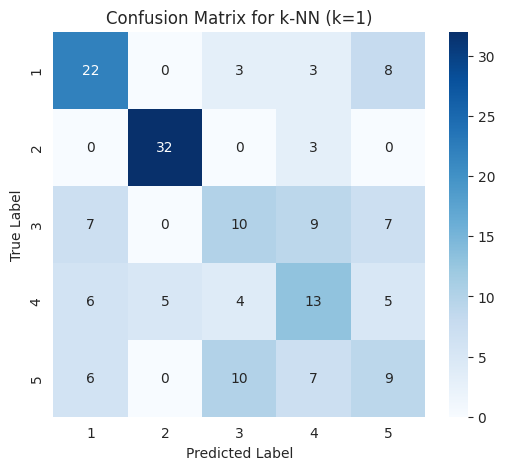

(array([[22,  0,  3,  3,  8],
        [ 0, 32,  0,  3,  0],
        [ 7,  0, 10,  9,  7],
        [ 6,  5,  4, 13,  5],
        [ 6,  0, 10,  7,  9]]),
 '              precision    recall  f1-score   support\n\n           1       0.54      0.61      0.57        36\n           2       0.86      0.91      0.89        35\n           3       0.37      0.30      0.33        33\n           4       0.37      0.39      0.38        33\n           5       0.31      0.28      0.30        32\n\n    accuracy                           0.51       169\n   macro avg       0.49      0.50      0.49       169\nweighted avg       0.50      0.51      0.50       169\n')

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for k-NN (k=1)")
plt.show()

class_report = classification_report(y_test, y_pred_best)

conf_matrix, class_report


The k-NN model with k=1 achieved 50.89% accuracy, performing best on class 2 with 86% precision and 91% recall. This indicates that class 2 is well-separated from others in feature space. Class 1 has decent recall (61%) but lower precision (54%), meaning some predictions spill into other classes. Classes 3, 4, and 5 suffer the most misclassifications, often being confused with one another. This suggests significant overlap in their feature distributions. Using k=1 may have caused overfitting, making the model highly sensitive to noise. Increasing k could smooth out these errors.

5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

This k-NN model, while moderately accurate overall, makes significant misclassifications, particularly among classes 3, 4, and 5. In practice, relying solely on its predictions for high-stakes decisions like mine removal could be dangerous. Instead, it should be used as a preliminary screening tool, not a final decision-maker.

Given its strong performance for class 2, the model could be trusted more in cases where it predicts that type. However, for ambiguous cases—where the model assigns a mine type with low confidence or frequently misclassifies similar classes—it should be supplemented with human expertise or additional validation methods, such as metal detection, chemical testing, or secondary imaging techniques.

A confidence threshold approach could also improve decision-making. If the model assigns a prediction with low certainty (e.g., probability spread across multiple classes), an expert should manually verify the classification. Alternatively, using ensemble methods (e.g., combining k-NN with decision trees or deep learning models) may reduce errors in high-risk classifications.

In summary, this model should be one part of a larger risk-reduction system, assisting experts but not replacing human judgment, especially in cases where it tends to make frequent errors.

**Visualization:** Write your own function to make a kernel density plot.

The user should pass in a Pandas series or Numpy array.
The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
You can use Matplotlib or Seaborn's .lineplot, but not an existing function that creates kernel density plots.
You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn kdeplot.

We covered the Gaussian, and uniform kernels in class, but the Epanechnikov kernel is

 In order to make your code run reasonably quickly, consider using the pdist or cdist functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing for loops will be slow, but that's fine.

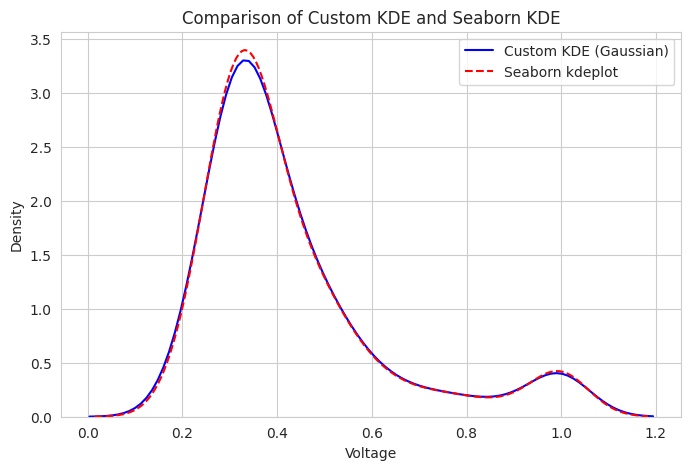

In [10]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import cdist


def kernel_density_estimate(data, kernel='gaussian', bandwidth=None, grid_size=100, x_range=None):
    """
    Custom Kernel Density Estimator.

    Parameters:
    - data: Pandas Series or Numpy array of values.
    - kernel: Type of kernel to use ('gaussian', 'uniform', 'epanechnikov').
    - bandwidth: Smoothing parameter. Defaults to Silverman's rule of thumb.
    - grid_size: Number of points to evaluate the density.
    - x_range: Tuple (min, max) defining the range of x-values for evaluation.

    Returns:
    - x_values: Points where the density is estimated.
    - density: Estimated density values.
    """

    data = np.asarray(data).flatten()

    if bandwidth is None:
        bandwidth = 1.06 * np.std(data) * (len(data) ** (-1 / 5))

    if x_range is None:
        x_min, x_max = data.min() - 3 * bandwidth, data.max() + 3 * bandwidth
    else:
        x_min, x_max = x_range

    x_values = np.linspace(x_min, x_max, grid_size)

    distances = cdist(x_values[:, None], data[:, None], metric='euclidean')

    if kernel == 'gaussian':
        weights = np.exp(-0.5 * (distances / bandwidth) ** 2) / (np.sqrt(2 * np.pi) * bandwidth)
    elif kernel == 'uniform':
        weights = (np.abs(distances) <= bandwidth) / (2 * bandwidth)
    elif kernel == 'epanechnikov':
        mask = np.abs(distances) <= bandwidth
        weights = (3 / 4) * (1 - (distances / bandwidth) ** 2) * mask / bandwidth
    else:
        raise ValueError("Kernel must be 'gaussian', 'uniform', or 'epanechnikov'.")

    density = weights.sum(axis=1) / len(data)

    return x_values, density

feature_data = df['voltage']

x_custom, density_custom = kernel_density_estimate(feature_data, kernel='gaussian')

plt.figure(figsize=(8, 5))
plt.plot(x_custom, density_custom, label="Custom KDE (Gaussian)", color="blue")
sns.kdeplot(feature_data, label="Seaborn kdeplot", color="red", linestyle="dashed")

plt.title("Comparison of Custom KDE and Seaborn KDE")
plt.xlabel("Voltage")
plt.ylabel("Density")
plt.legend()
plt.show()
